In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

# Step 2: Load datasets
messages = pd.read_csv('disaster_messages.csv')
categories = pd.read_csv('disaster_categories.csv')

# Step 3: Display first few rows to inspect
print("Messages dataset:")
display(messages.head())

print("\nCategories dataset:")
display(categories.head())

# Step 4: Merge datasets on 'id'
df = messages.merge(categories, on='id')

print("\nMerged dataset shape:", df.shape)
display(df.head())

# Step 5: Inspect data info
print("\nDataFrame Info:")
df.info()

# Step 6: Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Step 7: Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Messages dataset:


,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct



Categories dataset:


,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...



Merged dataset shape: (26386, 5)


,id,message,original,genre,categories
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related-1;request-0;offer-0;aid_related-0;medi...
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related-1;request-0;offer-0;aid_related-1;medi...
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related-1;request-0;offer-0;aid_related-0;medi...
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1;request-1;offer-0;aid_related-1;medi...
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,related-1;request-0;offer-0;aid_related-0;medi...



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26386 entries, 0 to 26385
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          26386 non-null  int64 
 1   message     26386 non-null  object
 2   original    10246 non-null  object
 3   genre       26386 non-null  object
 4   categories  26386 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.2+ MB

Missing values per column:
id                0
message           0
original      16140
genre             0
categories        0
dtype: int64

Number of duplicate rows: 170


Updated dataframe shape: (26386, 40)


,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Number of values greater than 1: 204

Average number of categories per message: 3.181384067308421
Max number of categories per message: 27


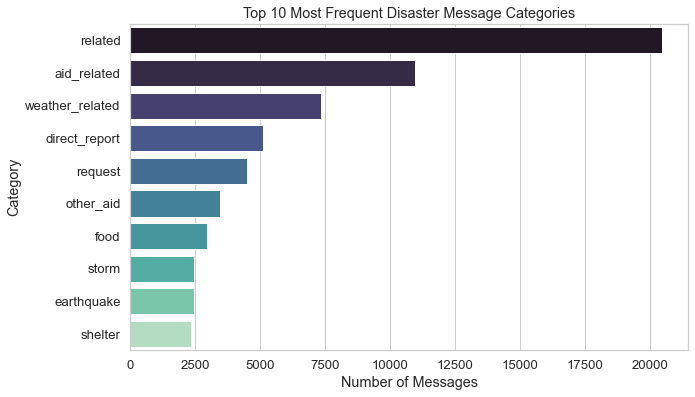


Top 10 categories:
0
related            20450
aid_related        10954
weather_related     7343
direct_report       5113
request             4513
other_aid           3464
food                2956
storm               2464
earthquake          2461
shelter             2342
dtype: int64

Proportion of messages per category:
0
related            0.775032
aid_related        0.415144
weather_related    0.278292
direct_report      0.193777
request            0.171038
other_aid          0.131282
food               0.112029
storm              0.093383
earthquake         0.093269
shelter            0.088759
dtype: float64


In [2]:
# Step 1: Split 'categories' column into separate category columns
categories = df['categories'].str.split(';', expand=True)

# Step 2: Extract column names for categories
row = categories.iloc[0]
category_colnames = row.apply(lambda x: x.split('-')[0])
categories.columns = category_colnames

# Step 3: Convert category values to 0/1 integers
for column in categories:
    categories[column] = categories[column].str[-1]   # get last character
    categories[column] = categories[column].astype(int)

# Step 4: Replace original 'categories' column in df
df = df.drop('categories', axis=1)
df = pd.concat([df, categories], axis=1)

print("Updated dataframe shape:", df.shape)
display(df.head())

# Step 5: Check for invalid values (should be only 0 or 1)
invalid_counts = (categories.apply(lambda x: x > 1)).sum().sum()
print(f"Number of values greater than 1: {invalid_counts}")

# Step 6: Count number of categories per message
df['num_categories'] = categories.sum(axis=1)

print("\nAverage number of categories per message:", df['num_categories'].mean())
print("Max number of categories per message:", df['num_categories'].max())

# Step 7: Count frequency of each category
category_counts = categories.sum().sort_values(ascending=False)

# Step 8: Visualize top 10 most frequent categories
plt.figure(figsize=(10,6))
sns.barplot(x=category_counts.head(10).values, y=category_counts.head(10).index, palette="mako")
plt.title("Top 10 Most Frequent Disaster Message Categories")
plt.xlabel("Number of Messages")
plt.ylabel("Category")
plt.show()

# Step 9: Display top categories and imbalance info
print("\nTop 10 categories:")
print(category_counts.head(10))

# Step 10: Check proportion of positive labels for imbalance comment
imbalance = (category_counts / len(df)).sort_values(ascending=False)
print("\nProportion of messages per category:")
print(imbalance.head(10))


In [3]:
# TASK 2

# Step 1: Import NLP tools
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download resources (run once)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Step 2: Initialize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Step 3: Define cleaning function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Remove mentions, hashtags, numbers, punctuation
    text = re.sub(r'[@#]\w+|\d+|[^\w\s]', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize
    tokens = text.split()
    
    # Remove stopwords and lemmatize
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    return ' '.join(cleaned_tokens)

# Step 4: Apply to dataset
df['clean_text'] = df['message'].astype(str).apply(clean_text)

# Step 5: Display results
display(df[['message', 'clean_text']].head(10))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chamudi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Chamudi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Chamudi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,message,clean_text
0,Weather update - a cold front from Cuba that c...,weather update cold front cuba could pas haiti
1,Is the Hurricane over or is it not over,hurricane
2,Looking for someone but no name,looking someone name
3,UN reports Leogane 80-90 destroyed. Only Hospi...,un report leogane destroyed hospital st croix ...
4,"says: west side of Haiti, rest of the country ...",say west side haiti rest country today tonight
5,Information about the National Palace-,information national palace
6,Storm at sacred heart of jesus,storm sacred heart jesus
7,"Please, we need tents and water. We are in Sil...",please need tent water silo thank
8,"I would like to receive the messages, thank you",would like receive message thank
9,I am in Croix-des-Bouquets. We have health iss...,croixdesbouquets health issue worker santo are...


In [6]:
# ================================
# TASK 3: TEXT REPRESENTATION
# ================================

# Step 1: Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

# Step 2: Define features (X) and labels (Y)
X = df['clean_text']
Y = df.drop(columns=['id', 'message', 'original', 'genre', 'clean_text', 'num_categories'])

# Step 3: Train-test split (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

# Step 4: Bag-of-Words (BoW)
bow_vectorizer = CountVectorizer(max_features=5000)
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)
print("BoW feature matrix shape:", X_train_bow.shape)

# Step 5: TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print("TF-IDF feature matrix shape:", X_train_tfidf.shape)

# ================================
# FIXED WORD CLOUD SECTION
# ================================
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

# Step 6: Use DejaVuSans font (bundled with Matplotlib)
import matplotlib
font_path = os.path.join(matplotlib.get_data_path(), "fonts/ttf/DejaVuSans.ttf")

all_text = ' '.join(X_train)

# Create WordCloud safely
wordcloud = WordCloud(
    width=900,
    height=500,
    background_color='white',
    max_words=100,
    font_path=font_path
).generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Disaster Messages', fontsize=14)
plt.show()

# ================================
# WORD2VEC AND PCA VISUALIZATION
# ================================

# Step 7: Prepare data for Word2Vec
sentences = [text.split() for text in X_train]

# Step 8: Train small Word2Vec model
w2v_model = Word2Vec(sentences, vector_size=50, window=5, min_count=2, workers=4)

# Step 9: Extract word vectors and vocab
word_vectors = w2v_model.wv
vocab = list(word_vectors.key_to_index.keys())

# Step 10: Apply PCA to reduce dimensionality for visualization
X_embedded = PCA(n_components=2).fit_transform(word_vectors[vocab])

# Step 11: Visualize embeddings
plt.figure(figsize=(10, 7))
plt.scatter(X_embedded[:100, 0], X_embedded[:100, 1])
for i, word in enumerate(vocab[:30]):
    plt.annotate(word, xy=(X_embedded[i, 0], X_embedded[i, 1]))
plt.title("Word2Vec Embeddings Visualized via PCA", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# ================================
# TASK 3 SUMMARY
# ================================

print("\n✅ Task 3 completed successfully!")
print("BoW and TF-IDF matrices are ready for modeling.")
print("WordCloud and Word2Vec visualizations have been generated.")


Training samples: 21108
Testing samples: 5278
BoW feature matrix shape: (21108, 5000)
TF-IDF feature matrix shape: (21108, 5000)


ValueError: Only supported for TrueType fonts